In [106]:
%matplotlib inline

import math
import numpy as np
from numpy import linalg as lg
import matplotlib.pyplot as plt

# some constants


### Кривая Коха
Кривая Коха является типичным геометрическим фракталом. Процесс её построения выглядит следующим образом: берём единичный отрезок, разделяем на три равные части и заменяем средний интервал равносторонним треугольником без этого сегмента. В результате образуется ломаная, состоящая из четырёх звеньев длины 1/3. На следующем шаге повторяем операцию для каждого из четырёх получившихся звеньев и т. д… Предельная кривая и есть кривая Коха.

In [107]:
def koch_iteration(points):
    if len(points) < 2:
        return None
    
    def rotate(v, angle):
        return (v[0]*math.cos(angle) - v[1]*math.sin(angle), 
               v[0]*math.sin(angle) + v[1]*math.cos(angle))
    
    new_points = []
    for i in range(len(points)-1):        
        v = (points[i+1][0] - points[i][0], points[i+1][1] - points[i][1])
        u = (float(v[0])/3., float(v[1])/3.)
        w = rotate(u, math.pi/3.)
        
        new_points.append((points[i][0], points[i][1]))
        new_points.append((points[i][0] + u[0], points[i][1] + u[1]))
        new_points.append((points[i][0] + u[0] + w[0], points[i][1] + u[1] + w[1]))
        new_points.append((points[i][0] + 2.*u[0], points[i][1] + 2.*u[1]))
        
    new_points.append((points[len(points)-1][0], points[len(points)-1][1]))
    return new_points

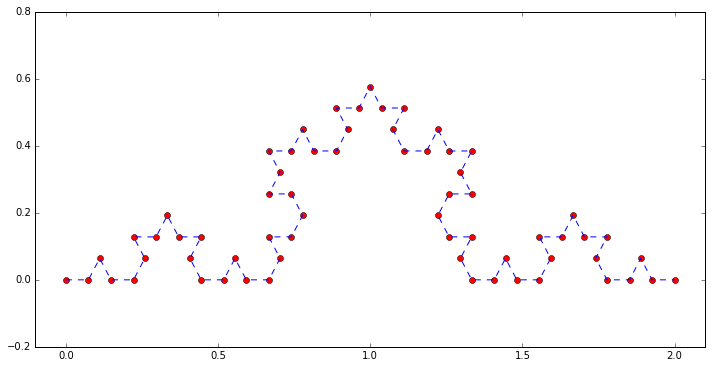

In [108]:
pylab.rcParams['figure.figsize'] = (12, 6)

points = [(0, 0), (2, 0)]

points = koch_iteration(points)
points = koch_iteration(points)
points = koch_iteration(points)

x = [points[i][0] for i in range(len(points))]
y = [points[i][1] for i in range(len(points))]

plt.axis([-0.1, 2.1, -0.2, 0.8])
plt.plot(x, y, 'ro')
plt.plot(x, y, '--')
plt.show()

In [109]:
def make_system(x, y, basis):
    A = [[0 for j in range(basis)] for i in range(basis)]
    b = [0 for i in range(basis)]
    
    for i in range(basis):
        for j in range(basis):    
            for k in range(len(x)):
                A[i][j] += x[k]**i * x[k]**j
        for k in range(len(y)):
            b[i] += y[k] * x[k]**i
        
    return A, b

[ -1.40811533e-04   9.40198752e+00  -7.52105267e+01   2.41989711e+02
  -3.99010979e+02   3.55472217e+02  -1.65704282e+02   3.60423312e+01
  -2.48500502e+00   1.60152827e-02]


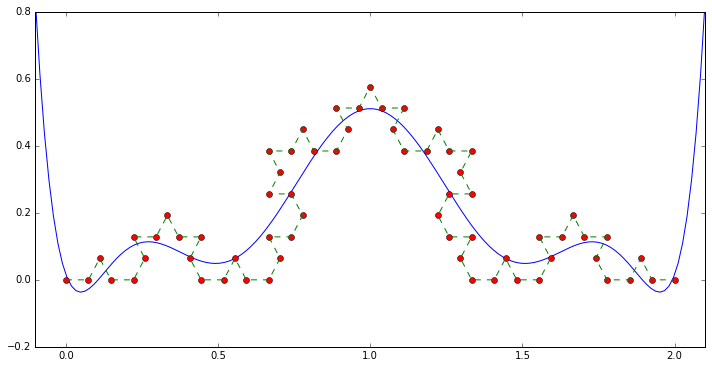

In [110]:
pylab.rcParams['figure.figsize'] = (12, 6)

A, b = make_system(x, y, 10)
A = np.array(A)
b = np.array(b)

c = lg.solve(A, b)[::-1]
print(c)
P = np.poly1d(c)

t = np.linspace(-0.1, 2.1, num=150)
plt.axis([-0.1, 2.1, -0.2, 0.8])
plt.plot(t, P(t))
plt.plot(x, y, 'ro')
plt.plot(x, y, '--')

plt.show()

In [111]:
def polylen(P, a, b, num=100):
    dP = np.polyder(P)
    I2 = np.polyadd(np.poly1d([1.0]), np.polymul(dP, dP))
    
    step = float(b - a)/float(num)
    
    S = 0.0
    for i in range(num):
        left = float(a) + float(i)*step
        right = left = float(a) + float(i)*step + step
        
        h = math.sqrt((I2(left) + I2(right))/2.0)
        S += step * h

    return S

In [112]:
polylen(P, 0, 2)

2.596208465185429